1. [Elastic Cache](#elastic-cache)
2. [Elastic Cache Architecture](#elastic-cache-architecture)
3. [Elastic Cache as Stateless](#elastic-cache-as-stateless)
4. [Amazon Redis vs Memcached](#amazon-redis-vs-memcached)
5. [Create Elastic Cache](#create-elastic-cache)
6. [After creating Elastic Cache](#after-creating-elastic-cache)
7. [Elastic Cache Strategies](#elastic-cache-strategies)
8. [Design Patterns for Caching](#design-patterns-for-caching)
9. [Lazy Loading / Cache Aside / Lazy Population](#lazy-loading--cache-aside--lazy-population)
10. [Write Through](#write-through)
11. [Cache Evictions & TTL](#cache-evictions--ttl)
12. [Tips for Elastic implementation](#tips-for-elastic-implementation)
13. [Amazon MemoryDB for Redis](#amazon-memorydb-for-redis)

#### Elastic Cache:
- It is managed Redis or Memcached
- Caches are in-memory databases with high performance and low latency
- Helps reduce loads of databases for read intensive workloads
- make application stateless
- AWS takes care of OS maintenance, patching, optimization, setup, monitoring, failure recovery, backups.
- involves heavy application code changes

#### Elastic Cache Architecture:
- App queries Elastic Cache first
- If the data is present in Elastic Cache then its a cache hit and retrieve the data
- If the data is not in Elastic Cache (cache miss) then it fetched data from RDS and store into Elastic Cache
- If another app or instance performs the same query then the data is present in Elastic cache and it results in cache hit
- This helps relieve stress/load on Amazon RDS
- Cache must have invalidation strategy, so that only recent data is stored in it.

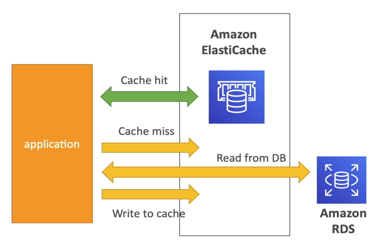

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/Elasticcache.jpeg')
new_image = img.resize((370, 250))
display(new_image)

#### Elastic Cache as Stateless:

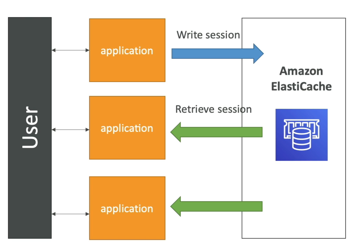

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/Elasticcache2.jpeg')
new_image = img.resize((350, 250))
display(new_image)

#### Amazon Redis vs Memcached:

- Redis:
    - multi AZ with auto failover
    - read replicas with high availability
    - data durability using AOF persistence
    - backup and restore features
    - Redis supports more complex data structures like lists, sets, sorted sets and hashes
    - supports data sharding features 
    - supports various eviction policies
    - supports built-in disk persistence

- Memcached:
    - multi-node for partitioning of data
    - No high availability
    - no persistence for data durability
    - backup and restore (serverless)
    - multi-threaded architecture
    - supports string key-value pairs

#### Create Elastic Cache:
- Search for Elastic Cache in AWS
- In Elastic Console, select Get started option
    - Redis *
    - Memcached
- Configuration
    - Deployment options
        - Serverless 
        - Design your own cache *
    - Creation method
        - Easy create
            - Configuration
                - Production
                - Dev/Test
                - Demo
        - Cluster cache *
            - Cluster mode
                - Enabled (replication on multiple shards)
                - Disabled (only one shared with 5 read replicas)
            - Cluster info
                - Name
                - Description
            - Location
                - AWS Cloud
                - On premises
                - Multi AZ (read replica cross AZs)
                - Auto-failover (read replica)
            - Cluster settings
                - Engine version
                - Port
                - Parameter groups
                - Node type
                - Number of replica
            - Subnet group settings
                - Create subnet group
                    - Name 
                    - Description
                    - VPC
                        - Already default VPC ID *
                        - Create VPC
                - Selected subnets
                    - Manage (to change the subnets availability zones)
            - Availability Zone placements (choose read replicas to go to which AZs)
        - Restore from backup
- Advanced Settings
    - Security
        - encryption at rest
            - AWS managed key (Default Key)
            - Customer managed CMK
        - encryption at flight
            - No access control
            - Redis Auth for access control of Elastic cache data
            - User Groups for access control of Elastic cache data
        - security groups
    - Back up
        - Retention period
        - Automatic backups
    - Maintenance
        - Window
        - SNS for notifying the maintenance updates to be performed
    - Logs
        - Slow logs
        - Engine logs
- Review
    


#### After creating Elastic Cache:
- Primary Endpoint (read/write)
- Reader Endpoint (read replica)

#### Elastic Cache Strategies:

##### Caching Implementation Considerations:
- Is it safe for data to be cached?
    - Mostly yes (when data is changing slowly and keys are accessed frequently. Also during caching of aggregation of results or key value caching)
    - But sometimes No, if data is out of date and eventually consistent (data which is frequently changing)


#### Design Patterns for Caching:
- Lazy Loading / Lazy Population / Cache-Aside
- Write-Through
- Cache Evictions & TTL (Time-to-Live)

#### Lazy Loading / Cache Aside / Lazy Population:
- Pros:
    - Only requested data is cached
    - Node failures are not fatal, just increased latency to warm the cache
        - if the data in cache is corrupted or lost, the query will be sent to RDS to fetch the data and later store in cache again

- Cons:
    - If we have cache miss, then we have 3 (calls) round trips (delay)
        - Cache miss
        - Query RDS
        - Write to Elastic Cache
    - Stale data
        - If data updated in RDS, the updated data will not be stored in Elastic Cache
        - Data consistency since the updated data is written to the cache only if we have a cache miss and not during cache hit


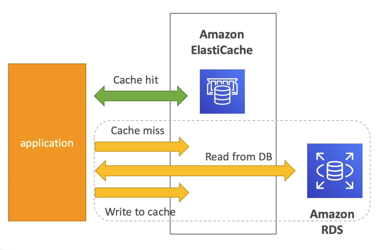

In [15]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/Lazy.jpeg')
new_image = img.resize((380, 250))
display(new_image)

### Write Through:
- Pros:
    - No Stale data
        - since the updated data is written to cache while writing to RDS
    - Write vs Read penalty 
        - each write has 2 calls, whereas reads have only 1 call
- Cons:
    - Missing data
        - until all updated data is written to the RDS. Mitigation would be is to setup Lazy Loading as well
    - Cache churn 
        - not all data stored in cache while writing to RDS is used frequently

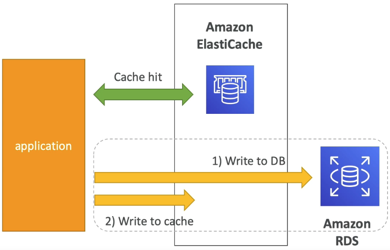

In [16]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/Write.jpeg')
new_image = img.resize((390, 250))
display(new_image)

#### Cache Evictions & TTL:
- Evictions can occur in 3 ways:
    - Delete explicit item in cache
    - Item is evicted due to memory full and LRU (Least Recently Used)
    - setup TTL (Time to Live)
        - TTL can range from seconds to days

Note:
- Sometime when we have too many cache evictions due to memory full, then we need to scale out 

#### Tips for Elastic implementation:

- Lazy Loading is easy to implement and suited for many situations
- Write Through comes as an optimization for Lazy Loading
- Be careful when using TTL during Write Through implementation

### Amazon MemoryDB for Redis:
- In-memory database service
- Ultra fast performance
- Provides Multi AZ for data durability
- Scale seamlessly from 10 GBs to 100s to TBs of storage
- Use cases: web application, gaming, media streaming, etc

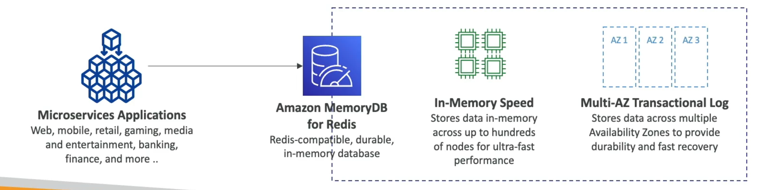

In [17]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/MemoryDB.jpeg')
new_image = img.resize((780, 190))
display(new_image)